<a href="https://colab.research.google.com/github/HadiyaArfa/-Real-Estate-Price-Prediction-and-Analysis/blob/main/Real_Estate_Price_Prediction_and_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Title: Real Estate Price Prediction and Analysis**

**Objective:**
The primary objective of this project is to develop a multi-model approached machine learning model  that predicts real estate prices based on various features, and to conduct an in-depth analysis of real estate data to provide insights for potential buyers, sellers, and investors.

**Summary:**
This project involves collecting real estate data, cleaning and preprocessing the dataset, building predictive models to estimate housing prices, performing exploratory data analysis to gain insights into factors affecting prices, and finally, presenting findings and predictions to assist stakeholders in making informed decisions.



In [383]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (10,5)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [384]:
# Load the dataset
data = pd.read_csv('/content/Real Estate-project2.csv')
data.head()

,Property ID,Location,Property Size (Sq ft),Bedrooms,Bathrooms,Amenities,Sale Price (INR)
0,1,Mumbai,2500,4,3,"Garage, Garden, Pool",25000000
1,2,Delhi,2000,3,2,Garden,18000000
2,3,Bangalore,1800,2,2,"Garage, Pool",15000000
3,4,Kolkata,3000,5,4,"Garage, Pool, Garden",32000000
4,5,Chennai,2200,3,2,Pool,20000000


In [385]:
data.shape

(75, 7)

**Data Preprocessing**

Lets drop unnecessary columns

In [387]:
print(data.columns)

Index(['Property ID', 'Location', 'Property Size (Sq ft)', 'Bedrooms',
       'Bathrooms', 'Amenities', 'Sale Price (INR)'],
      dtype='object')


In [388]:
data = data.drop(['Property ID'], axis=1)
data.head()

,Location,Property Size (Sq ft),Bedrooms,Bathrooms,Amenities,Sale Price (INR)
0,Mumbai,2500,4,3,"Garage, Garden, Pool",25000000
1,Delhi,2000,3,2,Garden,18000000
2,Bangalore,1800,2,2,"Garage, Pool",15000000
3,Kolkata,3000,5,4,"Garage, Pool, Garden",32000000
4,Chennai,2200,3,2,Pool,20000000


In [389]:
data.isnull().sum()

Location                 0
Property Size (Sq ft)    0
Bedrooms                 0
Bathrooms                0
Amenities                0
Sale Price (INR)         0
dtype: int64

In [390]:
len(data.Location.unique())

72

**Handling missing values**

In [391]:
data['Amenities'].replace('-', 'None', inplace=True)

 **Feature Engineering:**
Since 'Location and Amenities' is a text-based feature, we can perform feature engineering to convert it into a more structured format. One common approach is to create binary columns for each unique
 location and amenity

**One-Hot-Encoding**

In [392]:
Location_bn = pd.get_dummies(data.Location)
Location_bn.head()

,Ahmedabad,Ajmer,Aligarh,Allahabad,Amritsar,Asansol,Bangalore,Belgaum,Bhagalpur,Bharatpur,...,Shahjahanpur,Silchar,Siliguri,Surat,Thiruvananthapuram,Tiruchirappalli,Udaipur,Varanasi,Visakhapatnam,Warangal
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


To avoid dummy variable trap lets reduce 1 column

In [393]:
data = pd.concat([data, Location_bn.drop('Warangal', axis='columns')], axis='columns')
data.head()

,Location,Property Size (Sq ft),Bedrooms,Bathrooms,Amenities,Sale Price (INR),Ahmedabad,Ajmer,Aligarh,Allahabad,...,Sangli,Shahjahanpur,Silchar,Siliguri,Surat,Thiruvananthapuram,Tiruchirappalli,Udaipur,Varanasi,Visakhapatnam
0,Mumbai,2500,4,3,"Garage, Garden, Pool",25000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Delhi,2000,3,2,Garden,18000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Bangalore,1800,2,2,"Garage, Pool",15000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Kolkata,3000,5,4,"Garage, Pool, Garden",32000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Chennai,2200,3,2,Pool,20000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [394]:
data = data.drop('Location', axis='columns')
data.head()

,Property Size (Sq ft),Bedrooms,Bathrooms,Amenities,Sale Price (INR),Ahmedabad,Ajmer,Aligarh,Allahabad,Amritsar,...,Sangli,Shahjahanpur,Silchar,Siliguri,Surat,Thiruvananthapuram,Tiruchirappalli,Udaipur,Varanasi,Visakhapatnam
0,2500,4,3,"Garage, Garden, Pool",25000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2000,3,2,Garden,18000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1800,2,2,"Garage, Pool",15000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3000,5,4,"Garage, Pool, Garden",32000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2200,3,2,Pool,20000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [395]:
Amenities_bn = pd.get_dummies(data.Amenities)
Amenities_bn.head()

,"Garage, Garden","Garage, Garden, Home Office","Garage, Garden, Home Theater","Garage, Garden, Jacuzzi","Garage, Garden, Library","Garage, Garden, Playground","Garage, Garden, Pool","Garage, Garden, Study Room","Garage, Garden, Tennis Court","Garage, Garden, Yoga Studio",...,Pool,"Pool, Garden","Pool, Garden, Barbecue Area","Pool, Garden, Home Theater","Pool, Garden, Library","Pool, Garden, Study Room","Pool, Garden, Yoga Studio","Pool, Gym","Pool, Gym, Home Office","Pool, Gym, Study Room"
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [396]:
data = pd.concat([data, Amenities_bn.drop('Garage, Garden', axis='columns')], axis='columns')
data.head()

,Property Size (Sq ft),Bedrooms,Bathrooms,Amenities,Sale Price (INR),Ahmedabad,Ajmer,Aligarh,Allahabad,Amritsar,...,Pool,"Pool, Garden","Pool, Garden, Barbecue Area","Pool, Garden, Home Theater","Pool, Garden, Library","Pool, Garden, Study Room","Pool, Garden, Yoga Studio","Pool, Gym","Pool, Gym, Home Office","Pool, Gym, Study Room"
0,2500,4,3,"Garage, Garden, Pool",25000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2000,3,2,Garden,18000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1800,2,2,"Garage, Pool",15000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3000,5,4,"Garage, Pool, Garden",32000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2200,3,2,Pool,20000000,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [397]:
data = data.drop('Amenities', axis='columns')
data.head()

,Property Size (Sq ft),Bedrooms,Bathrooms,Sale Price (INR),Ahmedabad,Ajmer,Aligarh,Allahabad,Amritsar,Asansol,...,Pool,"Pool, Garden","Pool, Garden, Barbecue Area","Pool, Garden, Home Theater","Pool, Garden, Library","Pool, Garden, Study Room","Pool, Garden, Yoga Studio","Pool, Gym","Pool, Gym, Home Office","Pool, Gym, Study Room"
0,2500,4,3,25000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2000,3,2,18000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1800,2,2,15000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3000,5,4,32000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2200,3,2,20000000,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


Model Building using multi-model approach

In [398]:
# Extract features and target variable
X = data.drop(['Sale Price (INR)'],axis=1)
y = data['Sale Price (INR)']

In [399]:
print(X)

    Property Size (Sq ft)  Bedrooms  Bathrooms  Ahmedabad  Ajmer  Aligarh  \
0                    2500         4          3          0      0        0   
1                    2000         3          2          0      0        0   
2                    1800         2          2          0      0        0   
3                    3000         5          4          0      0        0   
4                    2200         3          2          0      0        0   
..                    ...       ...        ...        ...    ...      ...   
70                   1800         2          1          0      0        0   
71                   2100         3          2          0      0        0   
72                   2400         4          3          0      0        0   
73                   1950         3          2          0      0        0   
74                   1800         2          1          0      0        0   

    Allahabad  Amritsar  Asansol  Bangalore  ...  Pool  Pool, Garden  \
0  

In [400]:
print(y)

0     25000000
1     18000000
2     15000000
3     32000000
4     20000000
        ...   
70    12000000
71    18500000
72    21000000
73    17500000
74    12500000
Name: Sale Price (INR), Length: 75, dtype: int64


In [401]:
data.shape

(75, 113)

In [402]:
 # Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Lets first see the fit for RandomForest

In [403]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest model
rf_clf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_clf.fit(X_train, y_train)
rf_clf.feature_names_in_ = list(X.columns)

# Calculate the score on the test data
rf_score = rf_clf.score(X_test, y_test)

print(f'Random Forest Score: {rf_score}')


Random Forest Score: 0.6203226470588236


**Use K Fold cross validation to measure accuracy of our LinearRegression model**

Shufflesplit randomizes the folds equally for each sample

In [404]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.62662735, 0.91534298, 0.9007477 , 0.77697927, 0.84056677])

We can see that in 5 iterations we get an average score of 80% . This is pretty good but we want to test few other algorithms for regression to see if we can get even better score. We will use GridSearchCV for this purpose

**Finding best model using GridSearchCV**

In [405]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {}
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
                'splitter': ['best', 'random']
            }
        },
        'random_forest': {
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators': [10, 50, 100],
                'max_depth': [None, 10, 20, 30],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4]
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

# Assuming X and y are defined previously
find_best_model_using_gridsearchcv(X, y)


,model,best_score,best_params
0,linear_regression,0.762523,{}
1,lasso,0.673008,"{'alpha': 2, 'selection': 'cyclic'}"
2,decision_tree,0.802618,"{'criterion': 'absolute_error', 'splitter': 'r..."
3,random_forest,0.833522,"{'max_depth': None, 'min_samples_leaf': 1, 'mi..."


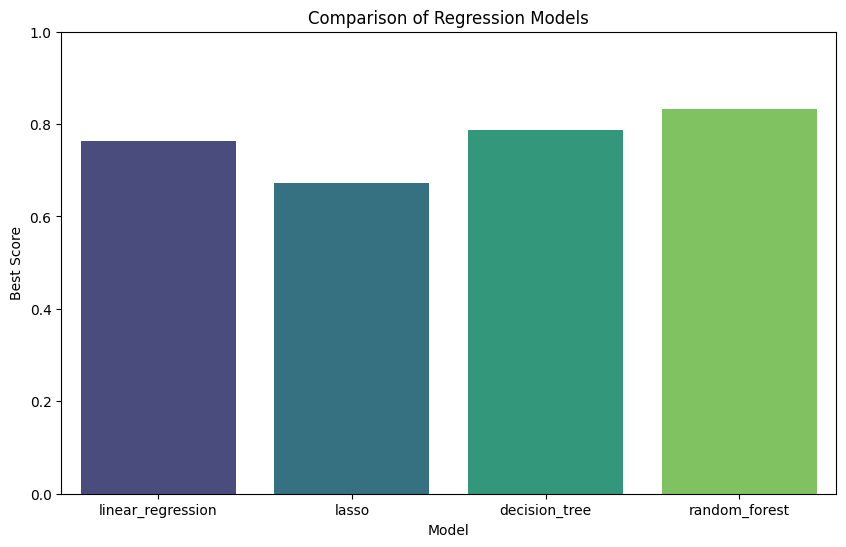

In [406]:
def plot_model_comparison(results):
    plt.figure(figsize=(10, 6))
    sns.barplot(x='model', y='best_score', data=results, palette='viridis')
    plt.title('Comparison of Regression Models')
    plt.xlabel('Model')
    plt.ylabel('Best Score')
    plt.ylim(0, 1)
    plt.show()

results_df = find_best_model_using_gridsearchcv(X, y)


# Plot the comparison using Seaborn
plot_model_comparison(results_df)


Based on above results we can say that RandomForest gives the best score. Hence we will use that.

**Test the model for few properties**

In [407]:
X.columns

Index(['Property Size (Sq ft)', 'Bedrooms', 'Bathrooms', 'Ahmedabad', 'Ajmer',
       'Aligarh', 'Allahabad', 'Amritsar', 'Asansol', 'Bangalore',
       ...
       'Pool', 'Pool, Garden', 'Pool, Garden, Barbecue Area',
       'Pool, Garden, Home Theater', 'Pool, Garden, Library',
       'Pool, Garden, Study Room', 'Pool, Garden, Yoga Studio', 'Pool, Gym',
       'Pool, Gym, Home Office', 'Pool, Gym, Study Room'],
      dtype='object', length=112)

In [408]:
np.where(X.columns=='Ahmedabad')[0][0]

3

In [409]:
def predict_price(location,sqft,bath,bedroom,amenities):
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bedroom
    x[3] = amenities
    if loc_index >= 0:
        x[loc_index] = 1

    return rf_clf.predict([x])[0]

In [410]:
predict_price('Ahmedabad',2100, 3, 2,0)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


17830000.0

In [411]:
predict_price('Ahmedabad',2000, 3, 2,0)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


17545000.0

In [412]:
predict_price('Bangalore',1800, 2, 2,1)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


15310000.0

**Tools and Libraries:**
pandas: Data manipulation and analysis.
seaborn: Data visualization.
numpy: Numerical operations.
matplotlib: Plotting visualizations.
scikit-learn: Machine learning models and tools.

**Data Loading and Preprocessing:**
Loaded real estate data from the provided CSV file.
Removed unnecessary columns, such as 'Property ID'.
Handled missing values, replacing them in the 'Amenities' column with 'None'.

**Feature Engineering:**
Transformed the 'Location' and 'Amenities' text-based features into a structured format using one-hot encoding.
Created binary columns for each unique location and amenity.
Addressed the dummy variable trap by dropping one column for each feature.

**Model Building:**
Extracted features (X) and the target variable (y).
Split the data into training and testing sets.
Utilized a RandomForestRegressor for initial model fitting.
Assessed the model's performance using the R-squared score.

**Cross-Validation:**
Employed K-Fold cross-validation to measure the accuracy of the Linear Regression model.
Utilized ShuffleSplit to randomize folds equally for each sample.

**Model Comparison:**
Employed GridSearchCV to find the best hyperparameters for various regression models (Linear Regression, Lasso, Decision Tree, and Random Forest).
Created a bar plot to visually compare the best scores achieved by each model.

**Best Model Selection:**
Determined that the RandomForestRegressor yielded the highest score.
Concluded to use the RandomForestRegressor for further analysis.

**Property Price Prediction:**
Created a function to predict property prices based on location, square footage, bathrooms, bedrooms, and amenities.
Tested the prediction function on different property scenarios.